In [30]:
#importing necessary packages
import os
import random
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt
import timeit
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from numpy import save
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from scipy.stats import randint as sp_randint
from sklearn.metrics import precision_score
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
#loading training dataset

X= np.load('X_cleaned_attempt_new.npy',allow_pickle=True)
Y= np.load('Y_cleaned_attempt_new.npy', allow_pickle=True)
feature_map = {'Rock':0,'Electronic':1,'Experimental':2,'Hip-Hop':3,'Folk':4,'Instrumental':5,'Pop':6,
              'International':7,'Classical':8,'Old-Time / Historic':9, 'Jazz':10,'Country':11,'Soul-RnB':12,
              'Spoken':13,'Blues':14,'Easy Listening':15}
for i in range(Y.shape[0]):
    Y[i] = float(feature_map[Y[i]])
Y[i] = np.asarray(Y[i]).astype('float32')


In [4]:
print(Y.shape)
print(X)

(9349,)
[[ 1.88896334e+00  7.60539293e-01  3.45296562e-01 ...  6.93301633e-02
   2.00800000e+03  2.37000000e+02]
 [ 5.27562976e-01 -7.76543170e-02 -2.79610306e-01 ...  4.48606014e-02
   2.00800000e+03  2.06000000e+02]
 [ 9.18444753e-01  6.74147248e-01  5.77818275e-01 ...  5.46228550e-02
   2.00800000e+03  2.07000000e+02]
 ...
 [-8.32871675e-01 -8.09869885e-01 -6.01314247e-01 ...  2.87115611e-02
   2.01700000e+03  1.79000000e+02]
 [-3.19849551e-01  6.53044164e-01  1.30036008e+00 ...  1.86791215e-02
   2.01700000e+03  3.80000000e+01]
 [-4.61559385e-01 -2.29600742e-01 -4.96632189e-01 ...  1.90590844e-02
   2.01700000e+03  2.17000000e+02]]


In [5]:
#loading test dataset
X_test=np.load('X_test.npy')
Y_test=np.load('Y_test.npy', allow_pickle=True)
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

In [6]:
print(X_test.shape, Y_test.shape)

(40249, 520) (40249,)


In [7]:
#Scaling the dataset Standard
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')
print(X.shape)

(9349, 520)


In [64]:

xfull = np.concatenate((X,X_test),axis=0)
yfull = np.concatenate((Y,Y_test),axis=0)
xtrainval, xtest, ytrainval, ytest = train_test_split(xfull,yfull,train_size=int(0.9*(X_test.shape[0]+X.shape[0])))

# split into training and validation
xtrain, xval, ytrain, yval = train_test_split(xtrainval,ytrainval,train_size=int(0.9*xtrainval.shape[0]))
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtrain = np.asarray(xtrain).astype('float32')
scaler.fit(xtest)
xtest = scaler.transform(xtest)
xtest=np.asarray(xtest).astype('float32')
scaler.fit(xval)
xval = scaler.transform(xval)
xval = np.asarray(xval).astype('float32')
#scaler.fit(ytrain)   #y dataset has been standard scaled before
#ytrain = scaler.transform(ytrain)
ytrain = np.asarray(ytrain).astype('float32')
#scaler.fit(yval)
#yval = scaler.transform(yval)
yval = np.asarray(yval).astype('float32')
print(xtest)


[[ 7.87089840e-02  1.63989663e-01 -1.01069279e-01 ...  1.50936295e-03
   4.92476135e-01 -2.27184176e-01]
 [-2.34066725e-01 -4.88411456e-01 -4.93721813e-02 ...  4.02931608e-02
   4.92476135e-01  1.45569801e-01]
 [-1.49510458e-01 -1.53205797e-01 -5.97188808e-02 ... -2.27115130e+00
  -2.01781297e+00 -7.35555112e-01]
 ...
 [-1.13374390e-01 -1.45049065e-01  4.80317809e-02 ... -7.47070849e-01
  -2.01781297e+00 -7.39188373e-01]
 [ 6.12923801e-01  6.64311767e-01 -5.21595478e-02 ...  7.79187903e-02
   4.99973476e-01 -7.40888044e-02]
 [ 5.24879396e-01 -6.40497386e-01 -1.12249255e-01 ... -6.65435661e-03
   4.94975239e-01  4.05166328e-01]]


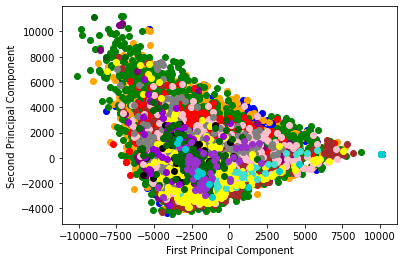

In [44]:
#full dataset
pca = PCA(n_components=2) # add your code here, create the principle compoenet using PCA object
transformed_data =pca.fit_transform(xfull) # add your code here, reduce the data dimnisions to two diminsions
X_digits, y_digits =xfull, yfull
# add your code here to visulzie your data, you should get simialr image as bellow. 
def plot_pca_scatter():
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'turquoise','yellow','black','darkviolet','darkgreen','darkorchid','darkturquoise']
    for i in range(len(colors)):
        px = transformed_data[:, 0][y_digits == i]
        py = transformed_data[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
    
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
plot_pca_scatter()

In [11]:
#full dataset
#SVM before feature normalization
start2 = timeit.default_timer()
rbf = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo').fit(xtrain, ytrain)
end2 = timeit.default_timer()
print(start2-end2)
start3 = timeit.default_timer()
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(xtrain, ytrain)
end3 = timeit.default_timer()
print(start3-end3)
start4 = timeit.default_timer()
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(xtrain, ytrain)
end4 = timeit.default_timer()
print(start4-end4)

-581.6667958999999
-616.4755315
-368.8293375999997


In [25]:
#full dataset
#SVM before feature normalization
s=timeit.default_timer()
poly_pred = poly.predict(xtest)
rbf_pred = rbf.predict(xtest)
sig_pred = sig.predict(xtest)
e=timeit.default_timer()
print(e-s)

208.2055545000003


In [29]:
#full dataset
#SVM before feature normalization
# retrieve the accuracy and print it for all 3 kernel functions

accuracy_poly = poly.score(xtest, ytest)
accuracy_rbf = rbf.score(xtest, ytest)
accuracy_sig = sig.score(xtest, ytest)

print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

Accuracy Polynomial Kernel: 0.056653225806451615
Accuracy Radial Basis Kernel: 0.2879032258064516
Accuracy Sigmoid Kernel: 0.06612903225806452


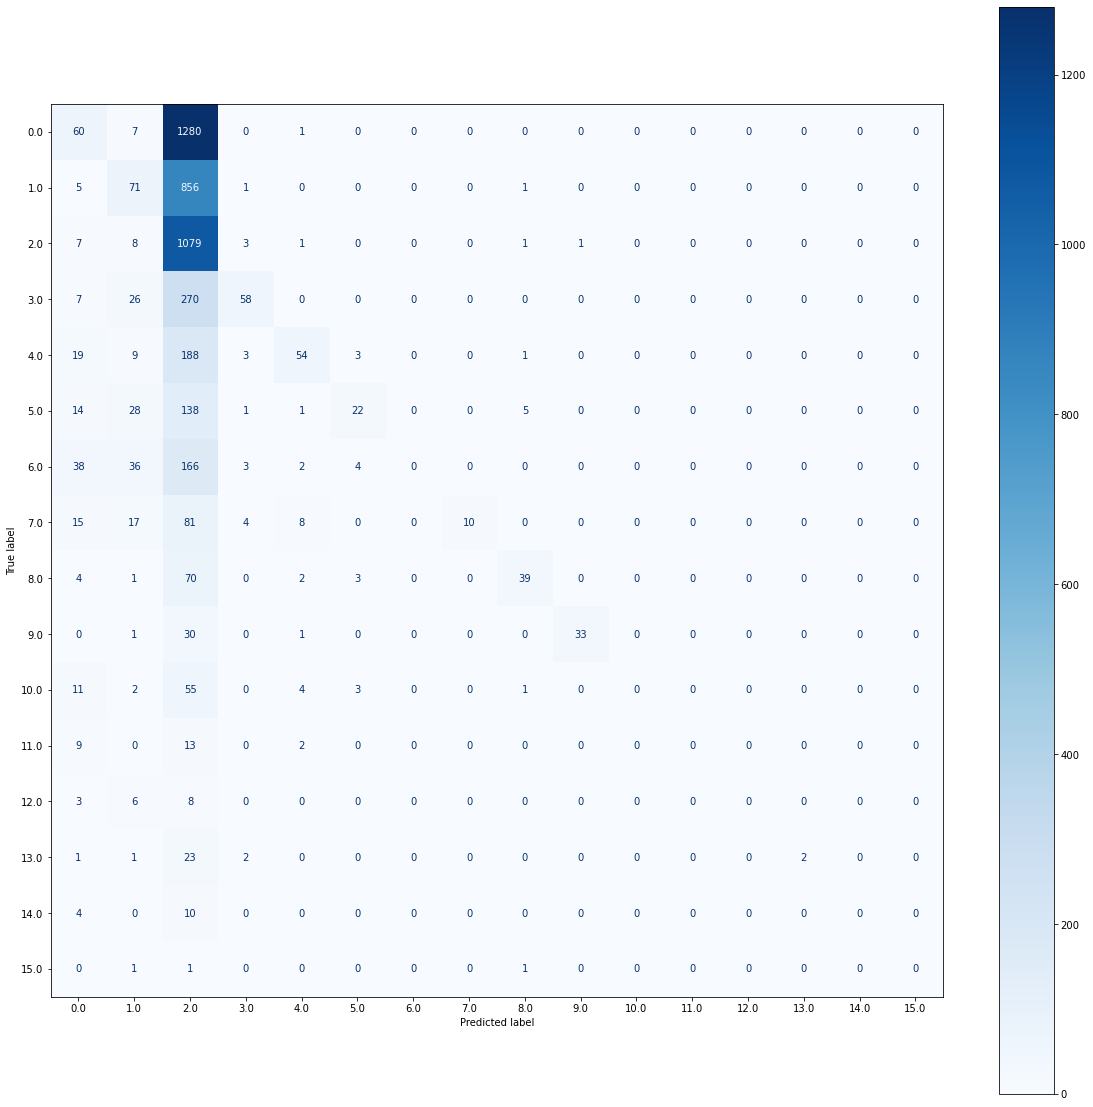

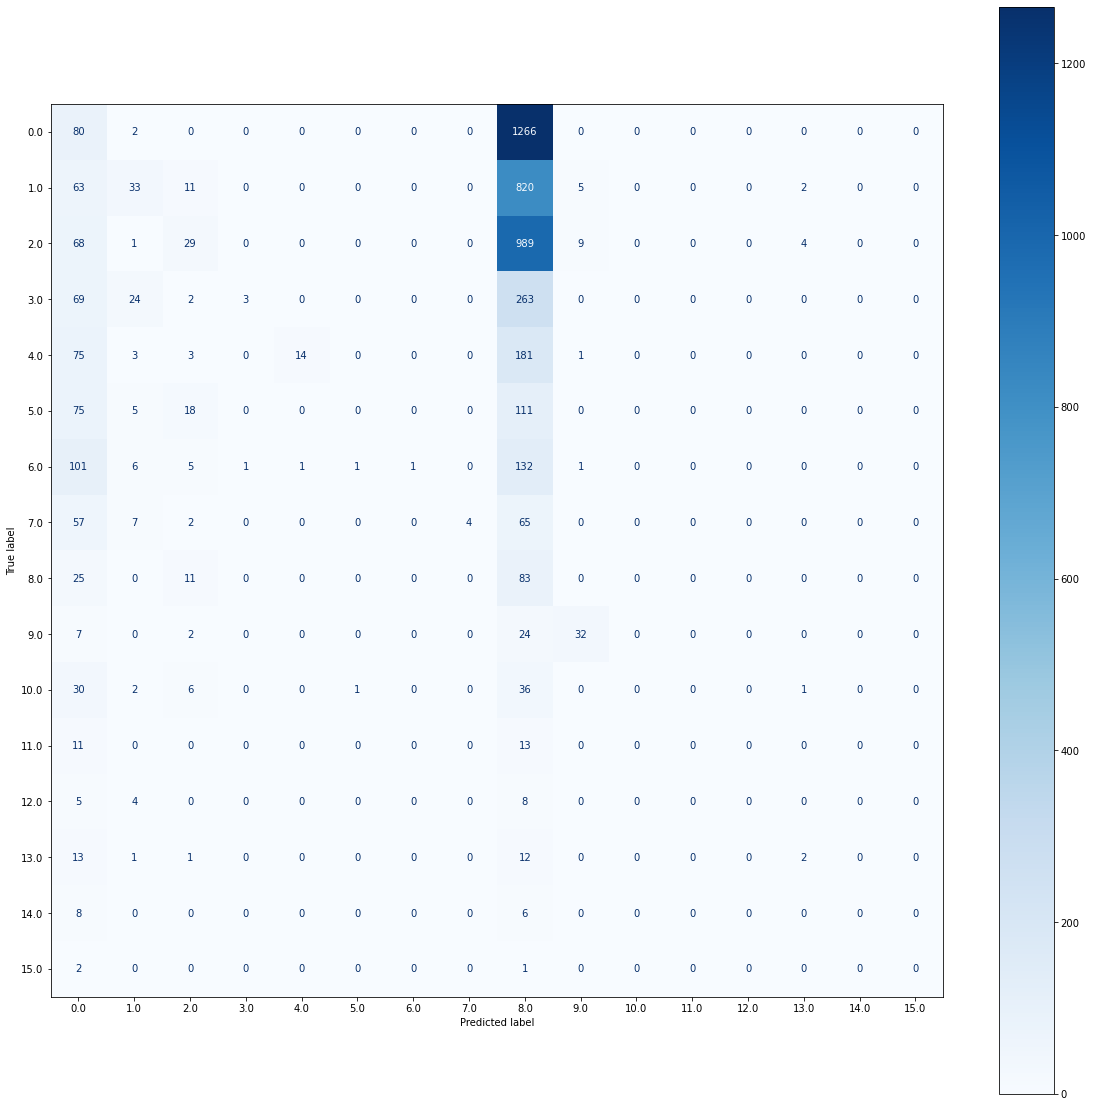

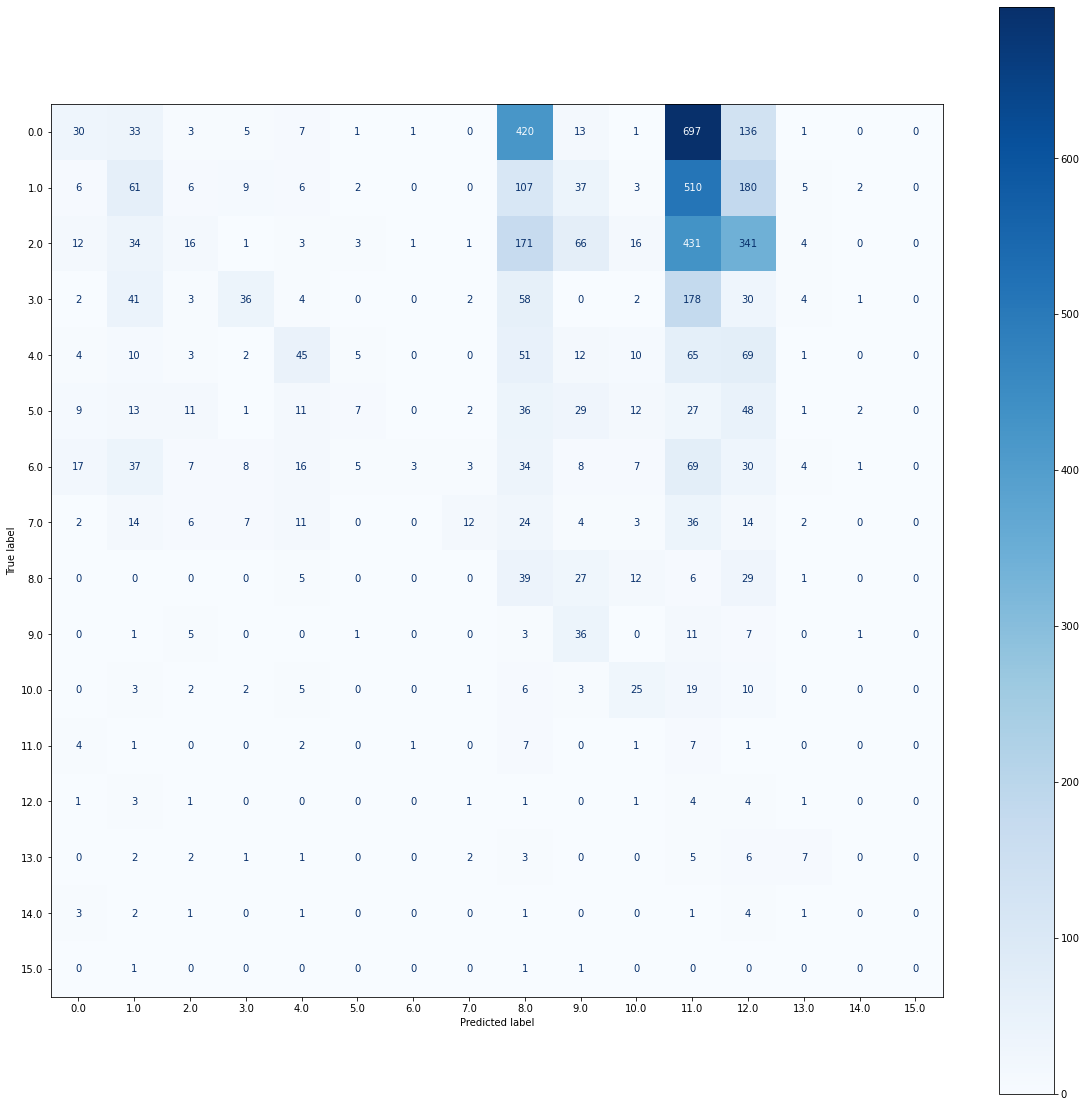

In [32]:
#full dataset
#SVM before feature normalization
for clf in (rbf,poly,sig):
    fig, ax = plt.subplots(figsize=(20, 20))
    plot_confusion_matrix(clf, xtest, ytest, cmap=plt.cm.Blues, ax=ax)
    plt.show()

In [47]:
#full dataset
#SVM before feature normalization
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='rbf', C=1, random_state=42)  #rbf= Radial Basis Function                  
scores = cross_val_score(clf, xtrain, ytrain, cv=5)
scores

#C=10 --> 0.53
#C=1--> 0.56, 0.64 and 0.68 (each time different result!)
#C=0.01 --> 0.34

array([0.64467953, 0.63634101, 0.64181705, 0.63907903, 0.64675131])

In [69]:
#full dataset
#feature normalization

# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)

# transform training data
X_train_norm = norm.transform(xtrain)

# transform testing dataabs
X_test_norm = norm.transform(xtest)
print(X_test_norm)

[[0.01050882 0.02427502 0.00221358 ... 0.11453594 1.0021245  0.01430423]
 [0.00707523 0.01203231 0.00258518 ... 0.11584274 1.0021245  0.02352711]
 [0.00800347 0.01832265 0.00251081 ... 0.03795945 0.02473307 0.00172585]
 ...
 [0.00840017 0.01847571 0.00328534 ... 0.08931279 0.02473307 0.00163595]
 [0.01637333 0.03366387 0.00256515 ... 0.11711052 1.0050436  0.0180922 ]
 [0.0154068  0.00917832 0.00213321 ... 0.11426086 1.0030975  0.02995019]]


In [70]:
#full dataset
#SVM after feature normalization
#rbf kernel
s = timeit.default_timer()
rbf2 = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo').fit(X_train_norm, ytrain)
e = timeit.default_timer()
print(e-s)
s1 = timeit.default_timer()
y_pred1 = rbf2.predict(X_test_norm)
e1 = timeit.default_timer()
print(e1-s1)
accuracy_rbf2 = rbf2.score(X_test_norm, ytest)
print(accuracy_rbf2)
print(confusion_matrix(ytest, y_pred1))

688.4871490000005
157.97057320000022
0.5905241935483871
[[1196   66  144    9   21    4    6    1    1    1    0    0    0    0
     0    0]
 [ 118  587  137   30    6   12   11    0    3    0    0    0    0    0
     0    0]
 [ 171  149  699   16   16    8    4    3    6    1    0    0    0    0
     0    0]
 [  40  123   19  153    0    2    7    2    0    0    0    0    0    0
     0    0]
 [  70   14   37    4  121   10    7    2    3    1    0    0    0    0
     0    0]
 [  35   18   70    1   26   35    2    1    4    1    0    0    0    0
     0    0]
 [  83   47   52   15   27   14   22    2    0    1    0    0    0    0
     0    0]
 [  37   16   31   14   17    4    7   14    2    0    0    0    0    0
     0    0]
 [   2    3   36    0    5   12    2    1   63    1    0    0    0    0
     0    0]
 [   1    0    5    0    0    1    3    1    1   39    0    0    0    0
     0    0]
 [  10    3   20    2    2    2    3    1    4    0    0    0    0    0
     0    0]
 [  11   

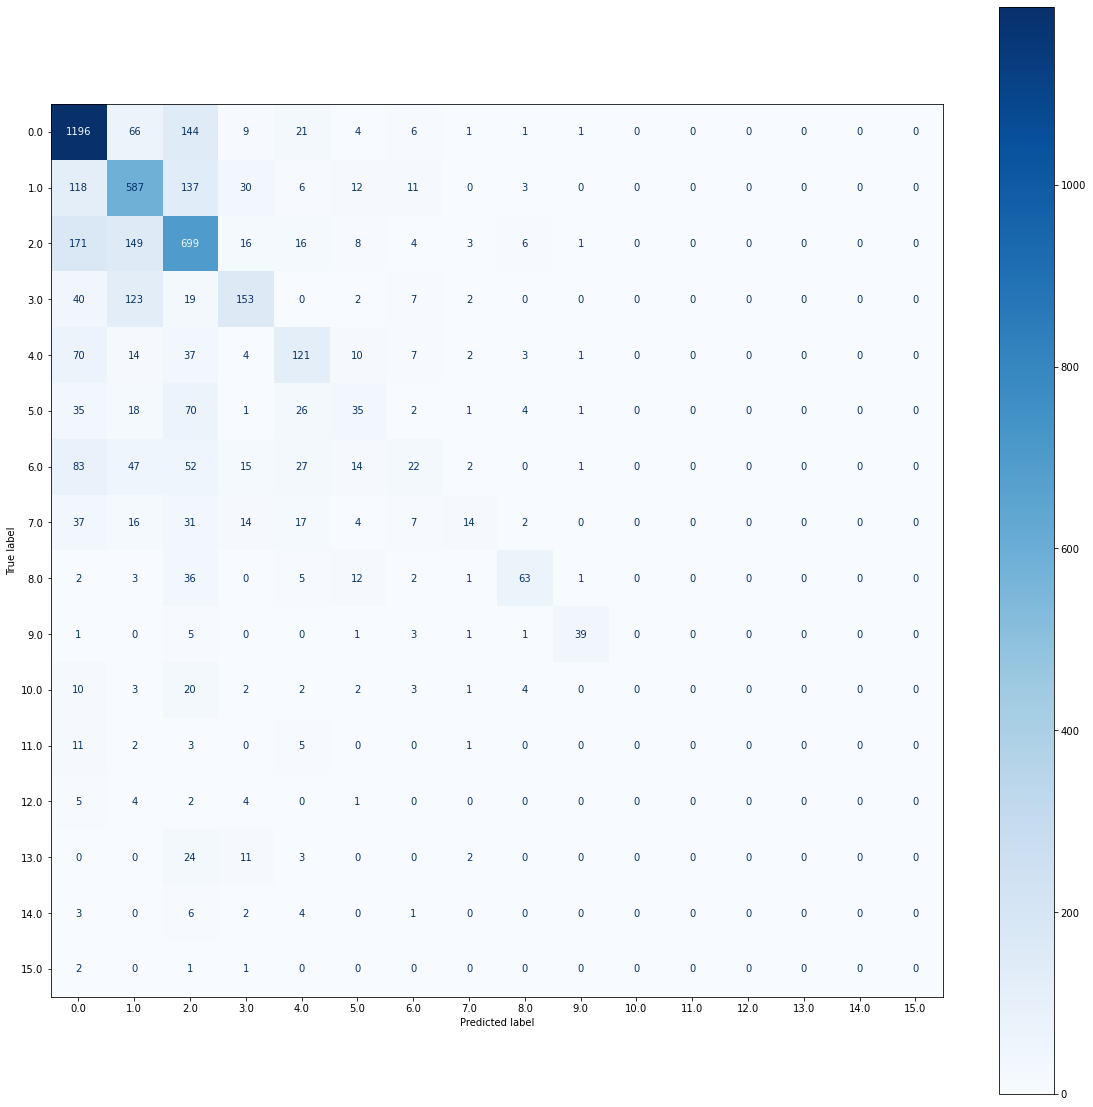

In [71]:
#full dataset
#SVM after feature normalization
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(rbf2, X_test_norm, ytest, cmap=plt.cm.Blues, ax=ax)
plt.show()

1610.3808102999974
111.69135649999953
0.6318548387096774
[[1192   63  140   12   21    7    9    2    1    0    1    0    0    1
     0    0]
 [  94  610  132   35    6   12   10    1    4    0    0    0    0    0
     0    0]
 [ 131  120  757   15   19    9    7    3    7    1    1    0    0    3
     0    0]
 [  26   95   18  200    0    1    3    3    0    0    0    0    0    0
     0    0]
 [  58   13   38    2  132   11    4    6    2    1    1    0    0    1
     0    0]
 [  31   28   60    2   20   42    2    1    2    2    3    0    0    0
     0    0]
 [  78   50   51   17   24   13   25    2    0    1    1    0    0    1
     0    0]
 [  31   17   27   12   13    2    3   35    1    0    0    0    0    1
     0    0]
 [   2    4   21    1    4    8    0    0   84    0    1    0    0    0
     0    0]
 [   2    0    2    0    0    0    3    1    1   42    0    0    0    0
     0    0]
 [   9    5   19    2    2    2    1    1    2    0    4    0    0    0
     0    0]
 [  11  

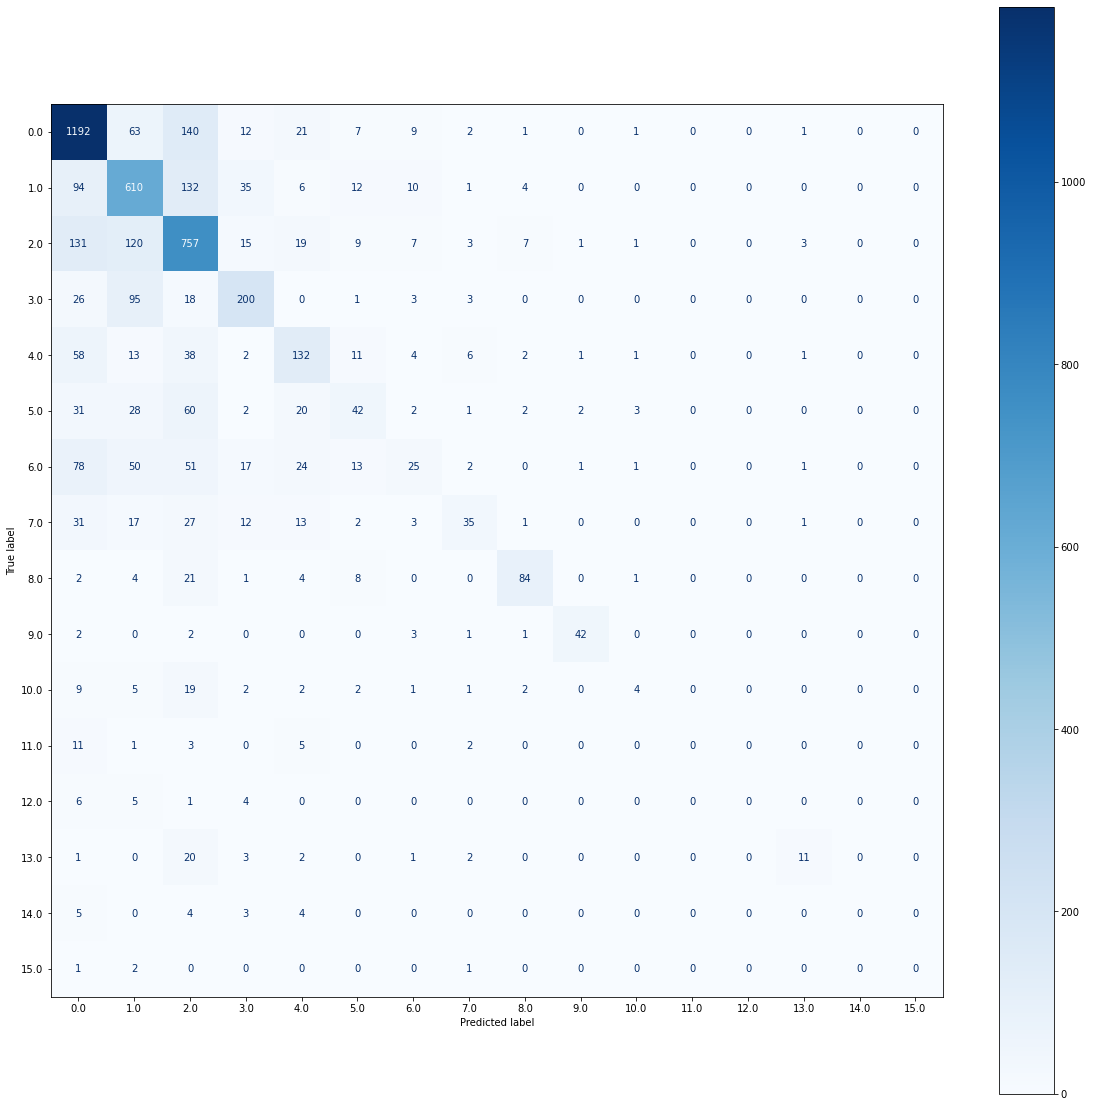

In [72]:
#full dataset
#SVM after feature normalization, poly kernel
s = timeit.default_timer()
poly2 = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train_norm, ytrain)
e = timeit.default_timer()
print(e-s)
s1 = timeit.default_timer()
poly_pred1 = poly2.predict(X_test_norm)
e1 = timeit.default_timer()
print(e1-s1)
accuracy_poly2 = poly2.score(X_test_norm, ytest)
print(accuracy_poly2)
print(confusion_matrix(ytest, poly_pred1))
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(poly2, X_test_norm, ytest, cmap=plt.cm.Blues, ax=ax)
plt.show()

2503.257887700005
146.40086840000004
0.2923387096774194
[[1449    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 899    3    1    1    0    0    0    0    0    0    0    0    0    0
     0    0]
 [1061   11    1    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 345    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 267    1    0    0    0    0    0    0    0    0    1    0    0    0
     0    0]
 [ 183    2    5    0    0    0    0    0    0    0    3    0    0    0
     0    0]
 [ 254    4    5    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 140    0    1    0    0    0    0    0    0    0    1    0    0    0
     0    0]
 [ 121    0    0    0    0    0    0    0    0    0    4    0    0    0
     0    0]
 [  51    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  47    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  22   

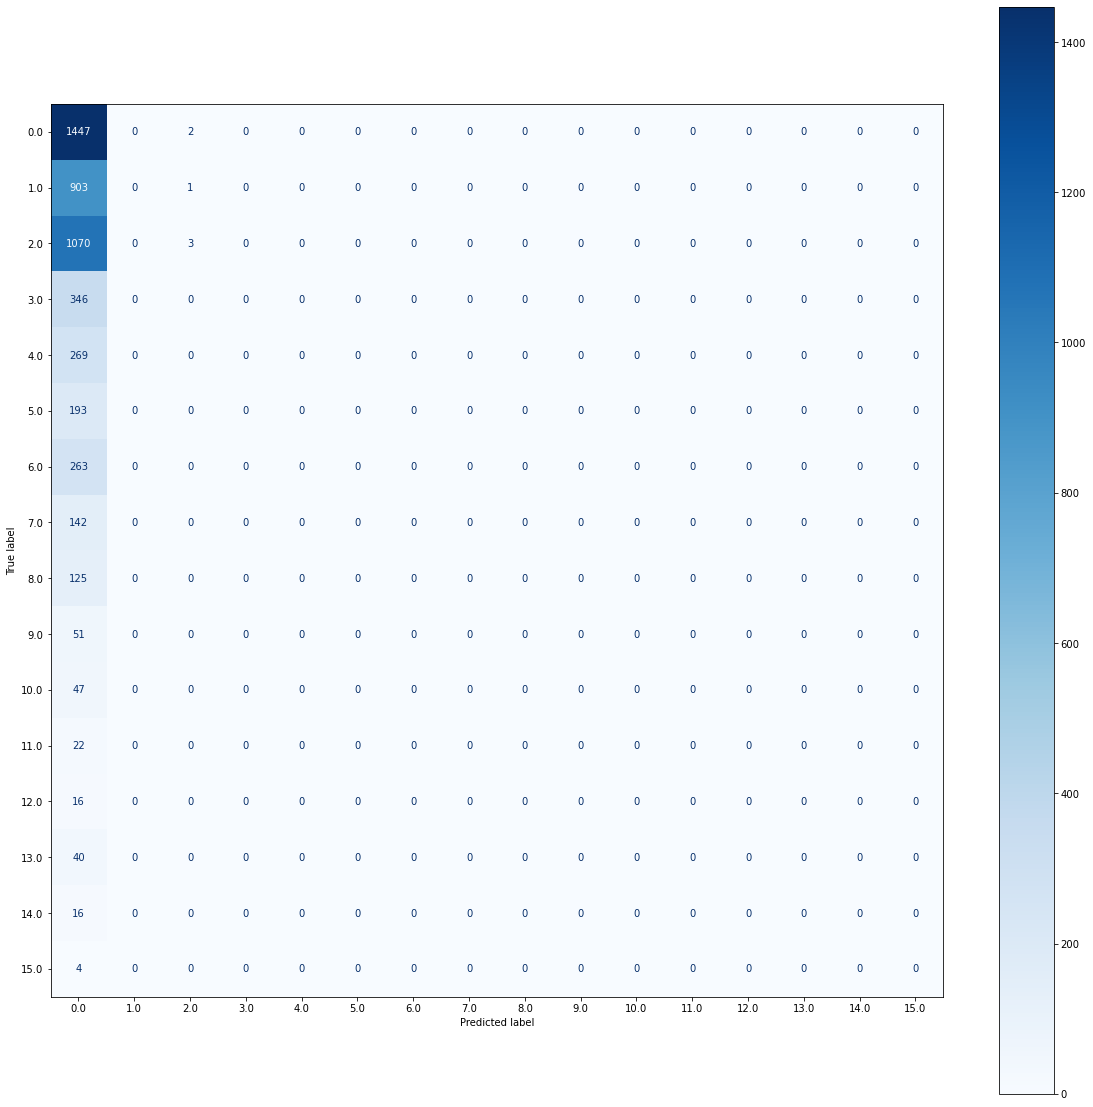

In [73]:
#full dataset
#SVM after feature normalization
#sig kernel
s = timeit.default_timer()
sig2 = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train_norm, ytrain)
e = timeit.default_timer()
print(e-s)
s1 = timeit.default_timer()
sig_pred1 = sig.predict(X_test_norm)
e1 = timeit.default_timer()
print(e1-s1)
accuracy_sig2 = sig2.score(X_test_norm, ytest)
print(accuracy_sig2)
print(confusion_matrix(ytest, sig_pred1))
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(sig2, X_test_norm, ytest, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [46]:
#full dataset
#K-fold
from sklearn.metrics import accuracy_score
s=timeit.default_timer()
y_pred = cross_val_predict(LogisticRegression(),xtrain, ytrain, cv=5)
print(metrics.classification_report(ytrain, y_pred))
print(accuracy_score(ytrain,y_pred))#,normalize=False))
print(metrics.confusion_matrix(ytrain, y_pred))
print(precision_score(ytrain,y_pred,average='micro')) #micro Calculates metrics globally by counting the total true positives, false negatives and false positives.
e=timeit.default_timer()
print(s-e)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

         0.0       0.73      0.82      0.77     11527
         1.0       0.62      0.65      0.64      7575
         2.0       0.60      0.64      0.62      8530
         3.0       0.61      0.61      0.61      2884
         4.0       0.52      0.51      0.51      2267
         5.0       0.38      0.26      0.31      1692
         6.0       0.26      0.10      0.15      1893
         7.0       0.45      0.37      0.40      1163
         8.0       0.72      0.72      0.72       988
         9.0       0.90      0.90      0.90       442
        10.0       0.39      0.25      0.30       463
        11.0       0.26      0.11      0.15       152
        12.0       0.12      0.04      0.06       136
        13.0       0.49      0.41      0.45       352
        14.0       0.11      0.01      0.02        90
        15.0       0.00      0.00      0.00        20

    accuracy                           0.63     40174
   macro avg       0.45   

In [32]:
#for small dataset
#K-fold
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X,Y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.5057234415727476


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
#for small dataset
#SVM
model = SVC(gamma=0.001, C = 100.0)
y_pred = cross_val_predict(model, X, Y, cv=5)
print(metrics.classification_report(Y, y_pred))
print(metrics.confusion_matrix(Y, y_pred))
print(accuracy_score(Y,y_pred))#,normalize=False))

              precision    recall  f1-score   support

         0.0       0.51      0.61      0.56      1001
         1.0       0.43      0.51      0.47      1001
         2.0       0.38      0.48      0.42      1001
         3.0       0.61      0.63      0.62      1001
         4.0       0.51      0.54      0.53      1001
         5.0       0.38      0.39      0.39      1001
         6.0       0.26      0.20      0.22      1001
         7.0       0.56      0.44      0.49       695
         8.0       0.81      0.71      0.75       616
         9.0       0.93      0.92      0.92       278
        10.0       0.42      0.30      0.35       286
        11.0       0.34      0.13      0.19        98
        12.0       0.35      0.10      0.16        88
        13.0       0.43      0.35      0.39       212
        14.0       0.17      0.02      0.03        56
        15.0       0.00      0.00      0.00        13

    accuracy                           0.49      9349
   macro avg       0.44   

In [30]:
#this was tested for small dataset which we afford to compute all these optimizations
#create and fit a ridge regression model, testing each alpha
#SVM
model = SVC()

C_range = np.logspace(0, 7, 13)
gamma_range = np.logspace(-8, 3, 13)

# print (C_range)
# print (gamma_range)

# specify parameters and distributions to sample from
param_dist = {"gamma": gamma_range,
              "C": C_range}

#grid = GridSearchCV(estimator=model, param_grid=param_dist)
# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(X, Y)

# summarize the results of the random search
print(random_search.best_score_)
print(random_search.best_estimator_.gamma)
print(random_search.best_estimator_.C)


0.49396133176670404
1e-08
46415.88833612782
